In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('hotel_reviews_labeled.csv')  
print("Sample data:")
print(df.head())

Sample data:
                                              review label
0   The room was spotless and beautifully decorated.  good
1           Amazing service and very friendly staff!  good
2  The breakfast buffet had great variety and taste.  good
3  Perfect location with a stunning view of the c...  good
4       We had a very comfortable and relaxing stay.  good


In [90]:
df.columns = ['review', 'label']
df.loc[df['label'] =='good', 'label'] = 1
df.loc[df['label'] =='bad', 'label'] = 0
df['label'] = df['label'].astype(int)


In [92]:
df.head()

,review,label
0,The room was spotless and beautifully decorated.,1
1,Amazing service and very friendly staff!,1
2,The breakfast buffet had great variety and taste.,1
3,Perfect location with a stunning view of the c...,1
4,We had a very comfortable and relaxing stay.,1


In [94]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.2, random_state=42)


In [96]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [98]:
# Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [100]:
y_pred = model.predict(X_test_vec)


In [102]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74        35
           1       0.81      0.58      0.68        38

    accuracy                           0.71        73
   macro avg       0.73      0.72      0.71        73
weighted avg       0.74      0.71      0.71        73



Confusion Matrix:


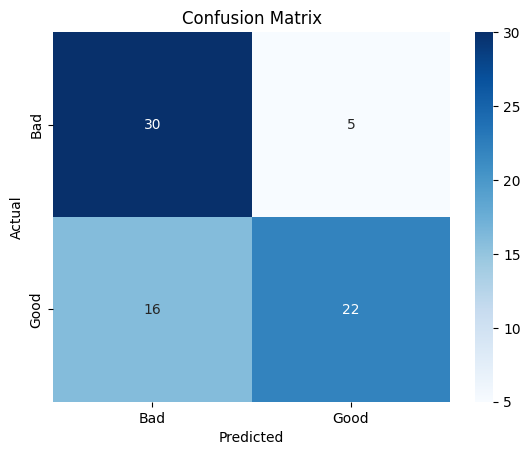

In [104]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [106]:
sample_reviews = [
    "The room was clean and the staff was friendly.",
    "It is best I do not visit again.",
]

In [108]:

sample_vecs = vectorizer.transform(sample_reviews)
preds = model.predict(sample_vecs)

In [110]:

for review, label in zip(sample_reviews, preds):
    sentiment = "Good" if label == 1 else "Bad"
    print(f"\nReview: \"{review}\"\nPredicted Sentiment: {sentiment}")



Review: "The room was clean and the staff was friendly."
Predicted Sentiment: Good

Review: "It is best I do not visit again."
Predicted Sentiment: Bad


In [114]:
import pickle

# Save model
with open('review_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
